# Predicting product sales through ads delivered on Social Networking Sites using ML Models


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

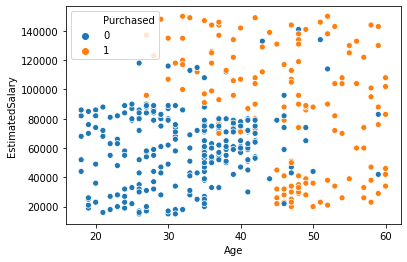

In [28]:
import seaborn as sns
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')

In [29]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Data
## Define, train and test a ML model
### We are using the following estimators:

* KNN
* SVM
* Kernel SVM
* Random Forest
* Decision Tree

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
#kNN
#Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred)
#accuracy of model
#c_knn=0
#for i in range(0,len(y_pred)):
#    if(y_pred[i]==y_test[i]):
#        c_knn=c_knn+1
#accuracy_knn=c_knn/len(y_pred)
print("Accuracy of Knn is")
accuracy_knn =round(accuracy_score(y_test,y_pred)*100,2)
print(accuracy_knn)

Accuracy of Knn is
93.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


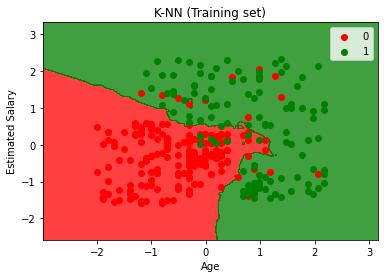

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


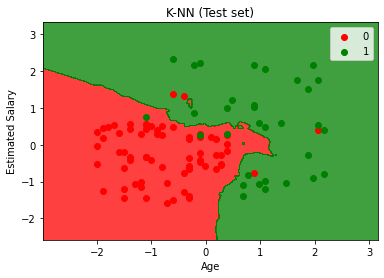

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [34]:
# SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred)
#accuracy of model
accuracy_svm=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy of SVM is")
print(accuracy_svm)

Accuracy of SVM is
90.0


In [36]:
#Kernel SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
#Predicting the Test set
y_pred = classifier.predict(X_test)
cm_kernel_svm = confusion_matrix(y_test, y_pred)
#accuracy of model
accuracy_kernel_svm=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy of Kernel SVM is")
print(accuracy_kernel_svm)

Accuracy of Kernel SVM is
93.0


In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
#Predicting the Test set
y_pred = classifier.predict(X_test)
cm_randomforest = confusion_matrix(y_test, y_pred)
#accuracy of model
accuracy_randomforest=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy of Random Forest is")
print(accuracy_randomforest)

Accuracy of Random Forest is
91.0


In [40]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [41]:
y_pred = classifier.predict(X_test)
cm_decisiontree = confusion_matrix(y_test, y_pred)
#accuracy of model
accuracy_decisiontree=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy of Decision Tree is")
print(accuracy_decisiontree)

Accuracy of Decision Tree is
91.0


In [43]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
#accuracy of model
accuracy_logisticregression=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy of Logistic Regression is")
print(accuracy_logisticregression)

Accuracy of Logistic Regression is
91.0


In [46]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Kernel SVM','KNN', 
              'Random Forest', 'Decision Tree', 'Logistic Regression'],
    'Score': [accuracy_svm,accuracy_kernel_svm, accuracy_knn, 
              accuracy_randomforest, accuracy_decisiontree, accuracy_logisticregression]})
models.sort_values(by='Score', ascending=False).set_index('Score')

,Model
Score,
93.0,Kernel SVM
93.0,KNN
91.0,Random Forest
91.0,Decision Tree
91.0,Logistic Regression
90.0,Support Vector Machines
